# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(mouse_metadata, study_results,how='inner', on="Mouse ID")

# Display the data table for preview
merged_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
len(mouse_metadata)

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merged_data[merged_data.duplicated()]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
g989 = merged_data[(merged_data['Mouse ID'] == 'g989')]
g989

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
merged_data_clean = merged_data.drop(range(908,920))
drug_regimens = merged_data_clean['Drug Regimen'].unique()
merged_data_clean

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
len(merged_data_clean['Mouse ID'].unique())-1

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
drug_reg = merged_data_clean.groupby(['Drug Regimen'])
drug_reg_mean = drug_reg.mean(numeric_only=True)
drug_reg_med = drug_reg.median(numeric_only=True)
drug_reg_var = drug_reg.var(numeric_only=True)
drug_reg_std = drug_reg.std(numeric_only=True)
sample_set = [drug_reg.sample(20) for sample in range(0,10)]
drug_reg_sem = [sem(sample['Tumor Volume (mm3)']) for sample in sample_set]
list_sem = list(drug_reg_sem)

In [8]:
# Assemble the resulting series into a single summary DataFrame.

# In order to keep suffixes organized, changed column names as merges occurred. 
merged_df1 = pd.merge(drug_reg_mean, drug_reg_med, how='outer', on='Drug Regimen')
new_merged_df = merged_df1.rename(columns={'Age_months_x': 'Mean Age (months)', 'Weight (g)_x': 'Mean Weight (g)', 'Timepoint_x': 'Mean Timepoint', 
                          'Tumor Volume (mm3)_x': 'Mean Tumor Volume (mm3)', 'Metastatic Sites_x': 'Mean Metastatic Sites',
                          'Age_months_y': 'Median Age (months)', 'Weight (g)_y': 'Median Weight (g)', 'Timepoint_y': 'Median Timepoint', 
                          'Tumor Volume (mm3)_y': 'Median Tumor Volume (mm3)', 'Metastatic Sites_y': 'Median Metastatic Sites'})

merged_df2 = pd.merge(new_merged_df, drug_reg_var, how='outer', on='Drug Regimen')
new_merged_df2 = merged_df2.rename(columns={'Age_months': 'Age (months) Variance', 'Weight (g)': 'Weight (g) Variance', 'Timepoint': 'Timepoint Variance', 
                          'Tumor Volume (mm3)': 'Tumor Volume (mm3) Variance', 'Metastatic Sites': 'Metastatic Sites Variance'})

merged_df3 = pd.merge(new_merged_df2, drug_reg_std, how='outer', on='Drug Regimen')
new_merged_df3 = merged_df3.rename(columns={'Age_months': 'Age (months) St. Dev', 'Weight (g)': 'Weight (g) St. Dev', 'Timepoint': 'Timepoint St. Dev', 
                          'Tumor Volume (mm3)': 'Tumor Volume (mm3) St. Dev', 'Metastatic Sites': 'Metastatic Sites St. Dev'})
new_merged_df3['Drug Regimen SEM'] = list_sem
new_merged_df3

,Mean Age (months),Mean Weight (g),Mean Timepoint,Mean Tumor Volume (mm3),Mean Metastatic Sites,Median Age (months),Median Weight (g),Median Timepoint,Median Tumor Volume (mm3),Median Metastatic Sites,...,Weight (g) Variance,Timepoint Variance,Tumor Volume (mm3) Variance,Metastatic Sites Variance,Age (months) St. Dev,Weight (g) St. Dev,Timepoint St. Dev,Tumor Volume (mm3) St. Dev,Metastatic Sites St. Dev,Drug Regimen SEM
Drug Regimen,,,,,,,,,,,,,,,,,,,,,
Capomulin,13.456522,19.965217,21.565217,40.675741,0.713043,16.5,20.5,20.0,41.557809,0.0,...,7.466034,206.928043,24.947764,0.720790,7.721423,2.732404,14.384994,4.994774,0.848993,0.610979
Ceftamin,13.247191,27.398876,19.747191,52.591172,1.179775,12.0,28.0,20.0,51.776157,1.0,...,2.501016,204.031772,39.290177,1.402527,8.071406,1.581460,14.283969,6.268188,1.184283,0.617810
Infubinol,16.230337,27.196629,18.174157,52.884795,0.960674,20.0,27.0,15.0,51.820584,1.0,...,4.769028,181.534470,43.128684,1.054942,7.510278,2.183810,13.473473,6.567243,1.027104,0.656734
Ketapril,15.659574,27.861702,19.707447,55.235638,1.297872,18.0,28.0,20.0,53.698743,1.0,...,3.392536,196.839089,68.553577,1.942883,6.019670,1.841884,14.029935,8.279709,1.393873,0.607706
Naftisol,12.000000,27.166667,19.623656,54.331565,1.182796,9.0,27.0,20.0,52.509285,1.0,...,2.247748,201.208951,66.173479,1.479919,6.715855,1.499249,14.184814,8.134708,1.216519,0.539879
Placebo,10.734807,27.928177,18.674033,54.033581,1.441989,10.0,28.0,15.0,52.288934,1.0,...,3.378146,192.954266,61.168083,1.792449,6.354907,1.837973,13.890798,7.821003,1.338824,0.631073
Propriva,10.080537,27.127517,17.181208,52.389721,1.020134,8.0,26.0,15.0,50.712423,1.0,...,2.922819,187.946672,44.260826,1.222565,6.981168,1.709625,13.709364,6.652881,1.105697,0.662442
Ramicane,10.684211,19.679825,21.425439,40.216745,0.548246,9.0,19.0,20.0,40.673236,0.0,...,10.465318,203.796178,23.486704,0.477838,5.946629,3.235014,14.275720,4.846308,0.691259,0.660983
Stelasyn,12.784530,27.856354,19.226519,54.233149,0.872928,14.0,28.0,20.0,52.431737,1.0,...,2.701473,191.620626,59.450562,0.944874,7.939562,1.643616,13.842710,7.710419,0.972046,0.626168


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen'>

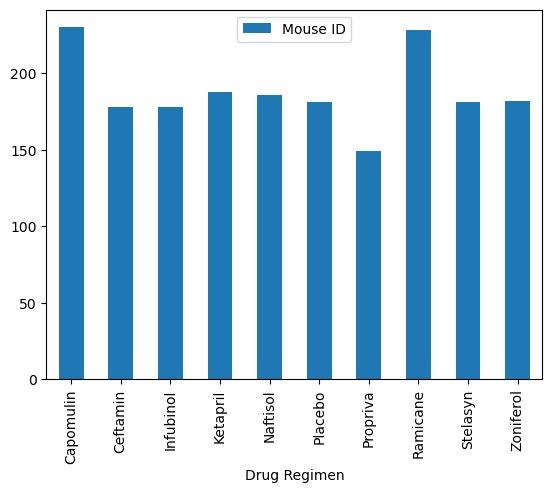

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) 
#for each drug regimen using Pandas.
bar_plot = pd.DataFrame(drug_reg['Mouse ID'].count()).reset_index()
bar_plot.plot.bar('Drug Regimen','Mouse ID')

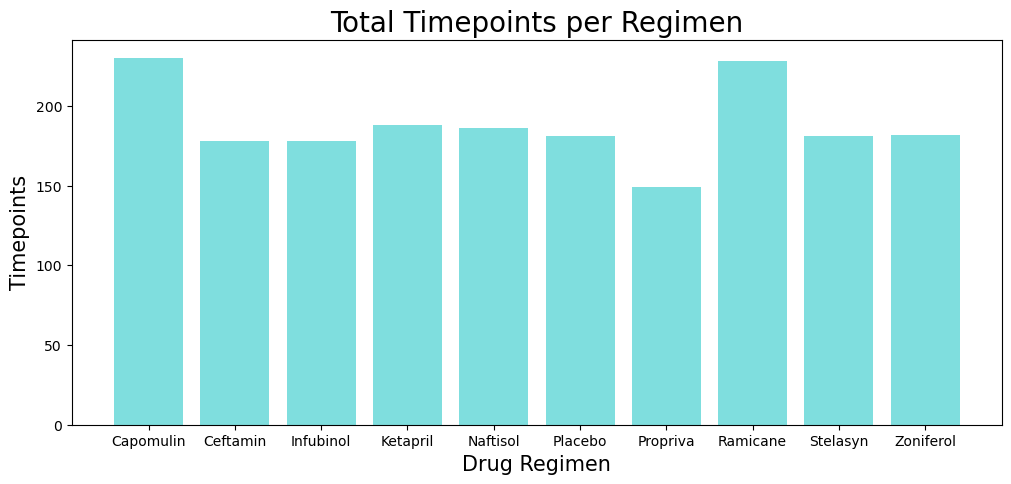

In [18]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen 
# using pyplot.
yval = drug_reg['Mouse ID'].count()
xval = ['Capomulin', 'Ceftamin', 'Infubinol','Ketapril', 'Naftisol', 'Placebo', 'Propriva', 
        'Ramicane', 'Stelasyn', 'Zoniferol' ]
plt.figure(figsize=(12,5))
plt.title('Total Timepoints per Regimen', fontsize=20)
plt.xlabel('Drug Regimen', fontsize=15)
plt.ylabel('Timepoints', fontsize=15)
plt.bar(xval, yval, color=['c'], alpha=.5)
plt.show()

array([<Axes: ylabel='Gender Distribution'>], dtype=object)

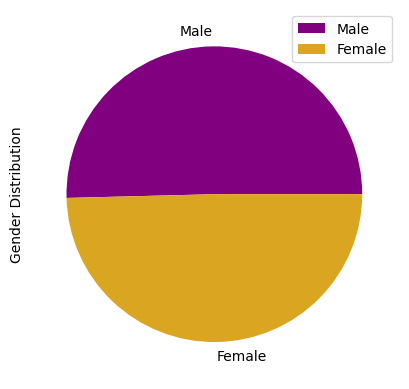

In [29]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex = mouse_metadata['Sex'].value_counts()
male = sex[0]
female = sex[1]-1
corrected_sex = [male,female]
ser = pd.Series(corrected_sex)
mouse_sexes = pd.DataFrame({"Male": male, "Female": female}, index=range(0,1)).T
mouse_sexes.plot.pie(ylabel='Gender Distribution', colors=['purple', 'goldenrod'], subplots=True)

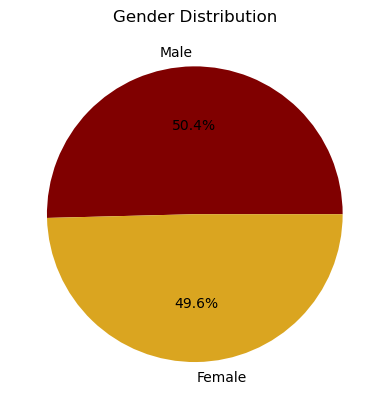

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = 'Male', 'Female'
sizes = [male, female]
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct="%1.1f%%", colors=['maroon', 'goldenrod'])
plt.title('Gender Distribution')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
final_tumor_vols_df = merged_data_clean.copy()
four_drugs = final_tumor_vols_df.loc[(final_tumor_vols_df["Drug Regimen"] == "Ramicane") | 
                                    (final_tumor_vols_df["Drug Regimen"] == "Capomulin") | 
                                    (final_tumor_vols_df["Drug Regimen"] == "Infubinol") | 
                                    (final_tumor_vols_df["Drug Regimen"] == "Ceftamin"),:]
last_vol = four_drugs.groupby('Mouse ID')['Tumor Volume (mm3)'].last()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_vol_df = pd.merge(merged_data_clean, last_vol, on='Mouse ID')
last_vol_df.rename(columns= {'Tumor Volume (mm3)_x': 'Tumor Volume (mm3)', 
                             'Tumor Volume (mm3)_y': 'Final Tumor Volume'}, 
                             inplace=True)
last_vol_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Final Tumor Volume
0,k403,Ramicane,Male,21,16,0,45.000000,0,22.050126
1,k403,Ramicane,Male,21,16,5,38.825898,0,22.050126
2,k403,Ramicane,Male,21,16,10,35.014271,1,22.050126
3,k403,Ramicane,Male,21,16,15,34.223992,1,22.050126
4,k403,Ramicane,Male,21,16,20,32.997729,1,22.050126
...,...,...,...,...,...,...,...,...,...
809,z581,Infubinol,Female,24,25,25,54.316407,2,62.754451
810,z581,Infubinol,Female,24,25,30,56.286750,2,62.754451
811,z581,Infubinol,Female,24,25,35,58.628399,3,62.754451
812,z581,Infubinol,Female,24,25,40,60.053740,3,62.754451


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin','Ceftamin' , 'Infubinol', 'Ramicane']

cap_tumor_data= final_tumor_vols_df.loc[(final_tumor_vols_df["Drug Regimen"] == "Capomulin"),'Tumor Volume (mm3)'].rename('Capomulin')
cef_tumor_data= final_tumor_vols_df.loc[(final_tumor_vols_df["Drug Regimen"] == "Ceftamin"),'Tumor Volume (mm3)'].rename("Ceftamin")
inf_tumor_data= final_tumor_vols_df.loc[(final_tumor_vols_df["Drug Regimen"] == "Infubinol"),'Tumor Volume (mm3)'].rename("Infubinol")
ram_tumor_data= final_tumor_vols_df.loc[(final_tumor_vols_df["Drug Regimen"] == "Ramicane"),'Tumor Volume (mm3)'].rename("Ramicane")
# Create empty list to fill with tumor vol data (for plotting)

#Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Set Quartiles (Lower, Upper, Mid)
cap_quartiles = cap_tumor_data.quantile([0.25,0.5,0.75])
cef_quartiles = cef_tumor_data.quantile([0.25,0.5,0.75])
inf_quartiles = inf_tumor_data.quantile([0.25,0.5,0.75])
ram_quartiles = ram_tumor_data.quantile([0.25,0.5,0.75])
cap_lowerq = cap_quartiles[0.25]
cef_lowerq = cef_quartiles[0.25]
inf_lowerq = inf_quartiles[0.25]
ram_lowerq = ram_quartiles[0.25]
cap_upperq = cap_quartiles[0.75]
cef_upperq = cef_quartiles[0.75]
inf_upperq = inf_quartiles[0.75]
ram_upperq = ram_quartiles[0.75]

# IQRs
cap_iqr = cap_upperq-cap_lowerq
cef_iqr = cef_upperq-cef_lowerq
inf_iqr = inf_upperq-inf_lowerq
ram_iqr = ram_upperq-ram_lowerq
    
# Determine outliers using upper and lower bounds
# Lower Bounds
cap_lower_bound = cap_lowerq - (1.5*cap_iqr)
cef_lower_bound = cef_lowerq - (1.5*cef_iqr)
inf_lower_bound = inf_lowerq - (1.5*inf_iqr)
ram_lower_bound = ram_lowerq - (1.5*ram_iqr)

# Upper Bounds
cap_upper_bound = cap_upperq + (1.5*cap_iqr)
cef_upper_bound = cef_upperq + (1.5*cef_iqr)
inf_upper_bound = inf_upperq + (1.5*inf_iqr)
ram_upper_bound = ram_upperq + (1.5*ram_iqr)

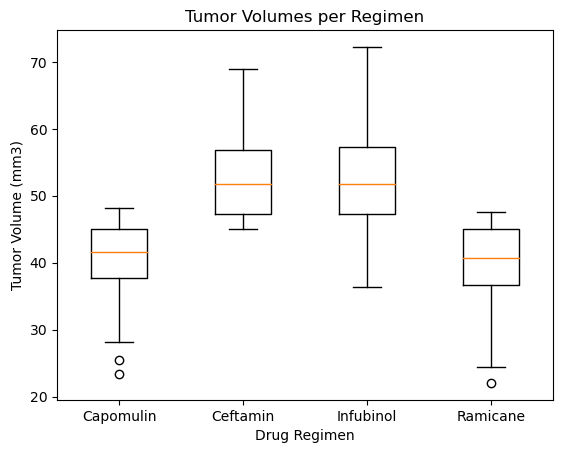

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volumes per Regimen')
ax1.set_xlabel('Drug Regimen')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot([cap_tumor_data, cef_tumor_data, inf_tumor_data, ram_tumor_data], labels=treatments)
plt.show()

## Line Plot

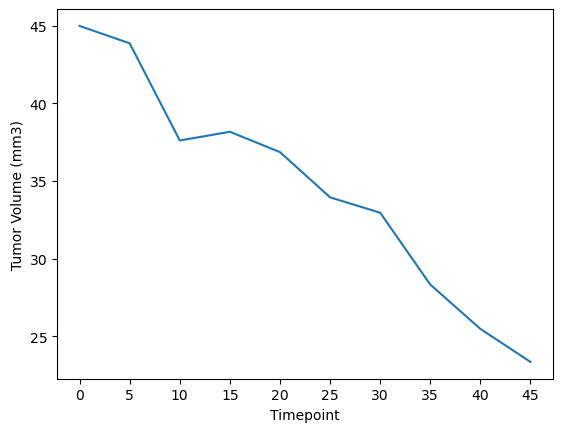

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin = final_tumor_vols_df.loc[(final_tumor_vols_df["Drug Regimen"] == "Capomulin"),['Mouse ID','Tumor Volume (mm3)', 'Timepoint']]
s185 = capomulin.loc[(capomulin["Mouse ID"] == "s185"),['Tumor Volume (mm3)', 'Timepoint']]
line_y = s185['Tumor Volume (mm3)']
line_x = s185['Timepoint']
plt.plot(line_x, line_y)
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Timepoint')
ticks = [0,5,10,15,20,25,30,35,40,45]
plt.xticks(ticks=ticks)
plt.show()

## Correlation and Regression

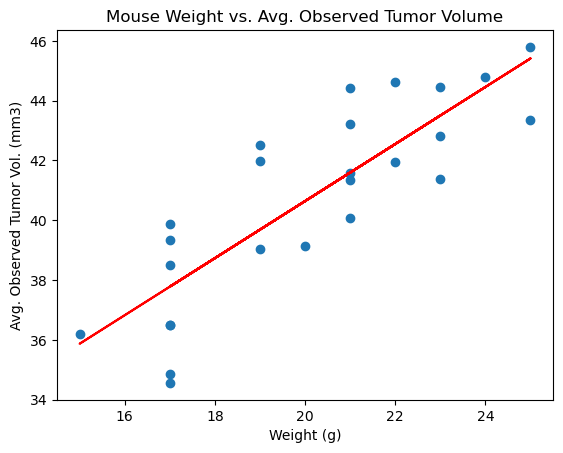

The correlation between mouse weight and average observed tumor volume is 0.84.


In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

treatment = 'Capomulin'
df1 = merged_data_clean.loc[merged_data_clean['Drug Regimen'] == treatment]
df2 = df1.groupby(['Mouse ID'])[['Tumor Volume (mm3)', 'Weight (g)']].mean()
x= df2['Weight (g)']
y = df2['Tumor Volume (mm3)']

plt.scatter(x, y)
plt.title('Mouse Weight vs. Avg. Observed Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Avg. Observed Tumor Vol. (mm3)')

# Trendline (courtesy of statology.org)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), color='r')
plt.show()

# Correlation 
correlation = st.pearsonr(x,y)
print(f"The correlation between mouse weight and average observed tumor volume is {round(correlation[0],2)}.")